<a href="https://colab.research.google.com/github/KumarAryan01/APR-ASSIGNMENT1-_LR/blob/main/APR_ASSIGNMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a linear regression model using the data in "data.csv". Include data preprocessing, model training, model evaluation (including accuracy), and data visualization.

## Load the data

### Subtask:
Load the data from the `data.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data from the CSV file into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
display(df.head())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Explore the data

### Subtask:
Display the first few rows, check for missing values, and understand the data types of each column.


**Reasoning**:
Display the first few rows, check for missing values, and understand the data types of each column using `.head()`, `.isnull().sum()`, and `.info()`.



In [2]:
display(df.head())
display(df.isnull().sum())
display(df.info())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

None

## Preprocess the data

### Subtask:
Handle missing values if any, and prepare the data for the linear regression model (e.g., separate features and target variable).


**Reasoning**:
Drop specified columns, separate the target variable 'price' into `y`, and the remaining features into `X` as per the instructions.



In [3]:
X = df.drop(['date', 'street', 'city', 'statezip', 'country', 'price'], axis=1)
y = df['price']
display(X.head())
display(y.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the features and target into training and testing sets using train_test_split with a test size of 0.2 and display the shapes of the resulting sets.



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3680, 12)
Shape of X_test: (920, 12)
Shape of y_train: (3680,)
Shape of y_test: (920,)


## Build and train the model

### Subtask:
Create a linear regression model and train it on the training data.


**Reasoning**:
Import the LinearRegression model and train it on the training data.



In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the model's performance using appropriate metrics (e.g., R-squared, Mean Squared Error) and calculate the accuracy.


**Reasoning**:
Evaluate the trained linear regression model on the test data using Mean Squared Error and R-squared metrics.



In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 986921767056.0986
R-squared: 0.032283856632802865


## Visualize the results

### Subtask:
Create visualizations to understand the relationship between the features and the target, and to visualize the model's predictions.


**Reasoning**:
Create scatter plots to visualize the relationship between a feature and the target, and to visualize the actual vs. predicted prices.



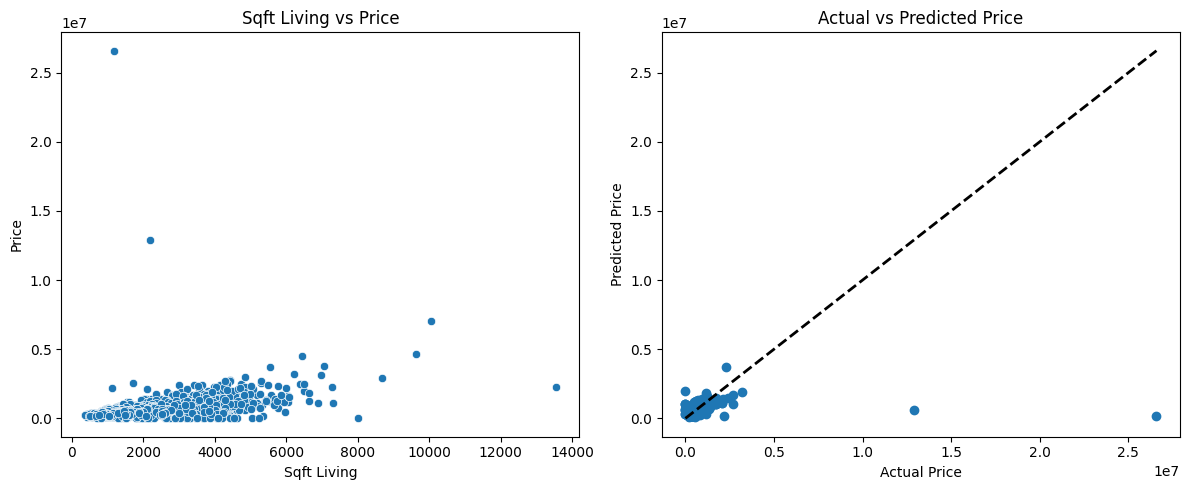

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Scatter plot of sqft_living vs price
plt.subplot(1, 2, 1)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Sqft Living vs Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')

# Scatter plot of actual vs predicted prices
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   There are no missing values in the dataset.
*   The data contains both numerical and object type columns.
*   After preprocessing, the feature set `X` has 12 columns and the target variable `y` is 'price'.
*   The data was split into training (80%) and testing (20%) sets, with `X_train` having a shape of (3680, 12), `X_test` having a shape of (920, 12), `y_train` having a shape of (3680,), and `y_test` having a shape of (920,).
*   The linear regression model achieved a Mean Squared Error (MSE) of 986,921,767,056.10 and an R-squared score of 0.0323 on the test set, indicating a poor model fit.
*   A scatter plot of 'sqft\_living' versus 'price' shows a general positive relationship.
*   A scatter plot of actual versus predicted prices shows that while there is some correlation, the predictions are not tightly clustered around the ideal diagonal line, confirming the low R-squared value.

### Insights or Next Steps

*   The low R-squared value suggests that a simple linear regression model is not a good fit for this dataset. Exploring non-linear models or including additional features could improve performance.
*   Further feature engineering, such as creating polynomial features or interaction terms, might help capture more complex relationships in the data.
